# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import pandas as pd
import seaborn as sns
from collections import defaultdict
import numpy as np

# Display raw wave of a audio

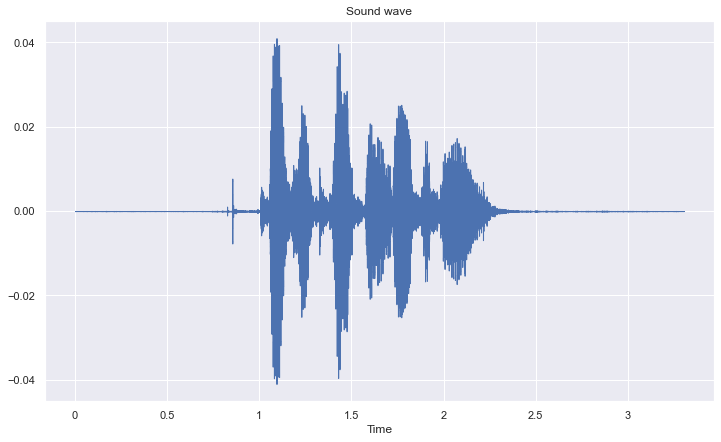

In [ ]:
filename = 'EDA_test/Sample_Emotions/03-01-01-01-01-01-01.wav'
fig = plt.figure(figsize=(12,7))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
plt.title('Sound wave');
plt.show()
ipd.Audio(filename)

In [ ]:
emotions = {
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

# Displaying samples from each class

Lets play the audio and visualize the raw wave form of audio belonging to each class

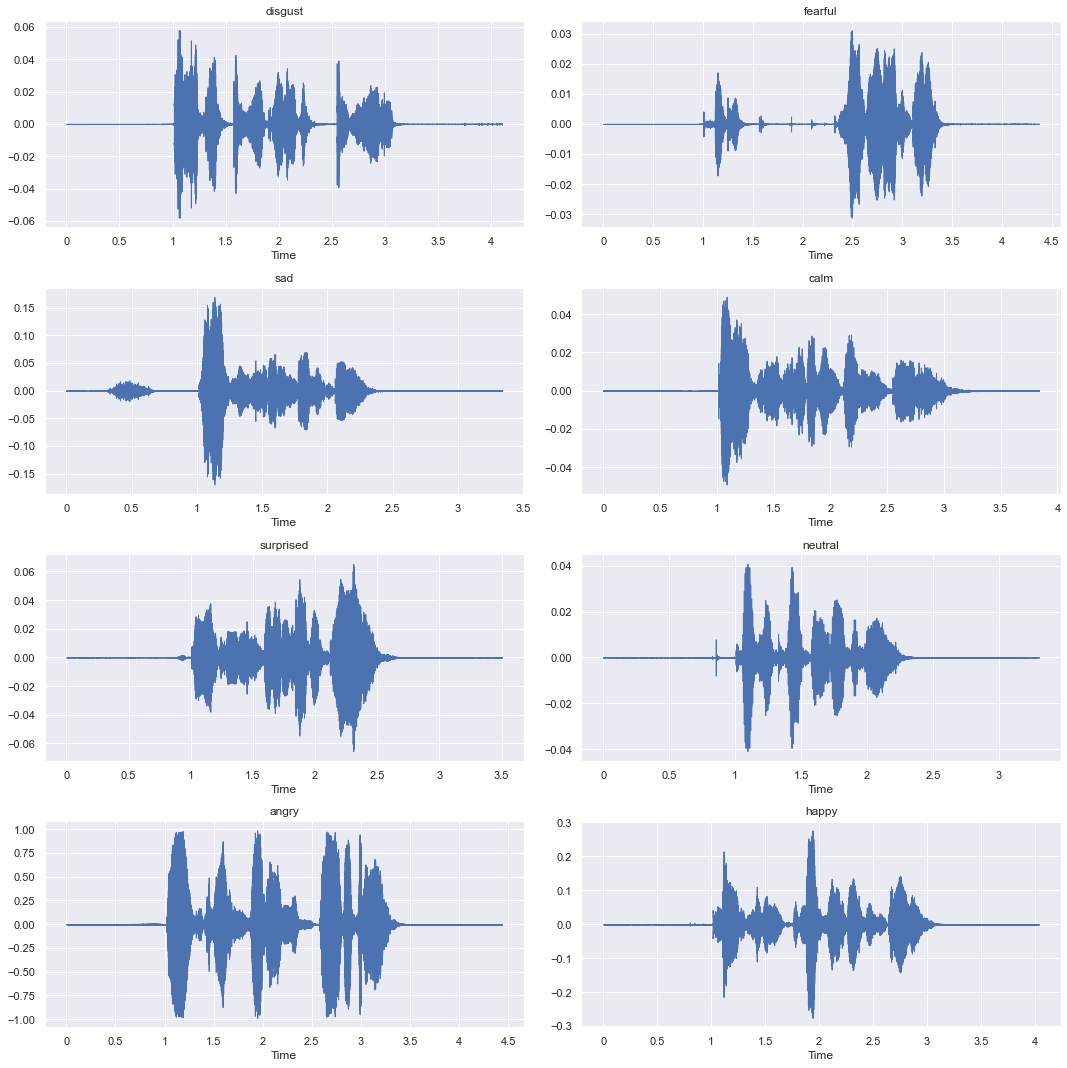

In [ ]:
dir_data = os.listdir('EDA_test/Sample_Emotions')
audio_df = pd.DataFrame(dir_data)
audio_df = audio_df.rename(columns={0:'file'})
fig, axs = plt.subplots(nrows=4, ncols=2, constrained_layout=False)
fig.set_size_inches(15, 15)

for i in range(audio_df.shape[0]):
    row = int(i / 2)
    col = i % 2
    wav_file = os.path.join(os.path.abspath('EDA_test/Sample_Emotions')+'/'+str(audio_df.file[i]))
    X, sample_rate = librosa.load(wav_file, res_type='kaiser_fast')

    file_name=str(audio_df.file[i])
    emotion=emotions[file_name.split("-")[2]]

    librosa.display.waveshow(X,sr=sample_rate,ax=axs[row, col])
#     axs[row, col].plot(X)
    axs[row, col].set_title(emotion)

plt.tight_layout()
plt.savefig('EDA_plot/all_emotions_waves.png')


# Count number of samples for each class

In [ ]:
dir_data = os.listdir('Dataset/Actor')
audio_df = pd.DataFrame(dir_data)
audio_df = audio_df.rename(columns={0:'file'})

label = []

for i in range(audio_df.shape[0]):

    file_name=str(audio_df.file[i])
    emotion=emotions[file_name.split("-")[2]]
    label.append(emotion)


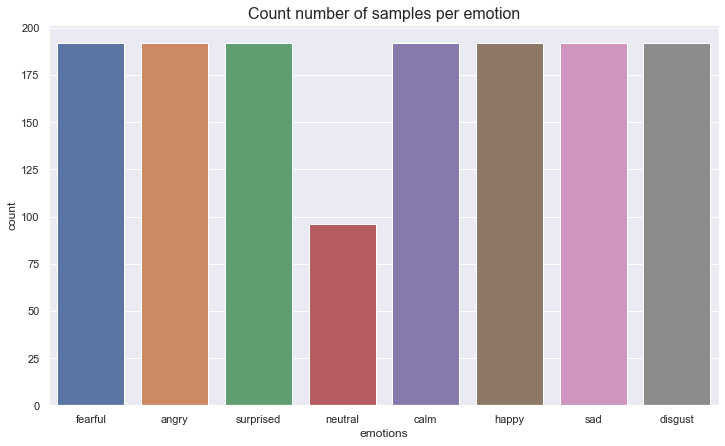

In [ ]:
label = pd.DataFrame(label)
label = label.rename(columns={0:'emotions'})
fig = plt.figure(figsize=(12,7))
plt.title('Count number of samples per emotion', size=16)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotions", data=label)
plt.savefig('EDA_plot/files_per_emotions_count.png')

The data seem to be equally distributed across all emotions except 'neutral' emotion. We will drop 'neutral' emotion in our analysis

#  Features of a audio signal

Let us look at how various features that can be extracted of the audio signals look like.

Librosa provides libraries for time-based, frequency-based, time-frequency based audio features extraction such as chromagrams, Mel spectrogram, MFCC, and various other spectral and rhythmic features.

/var/folders/x2/r3j0z2d177n9zh91qkvms7c40000gn/T/ipykernel_49049/3376447262.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


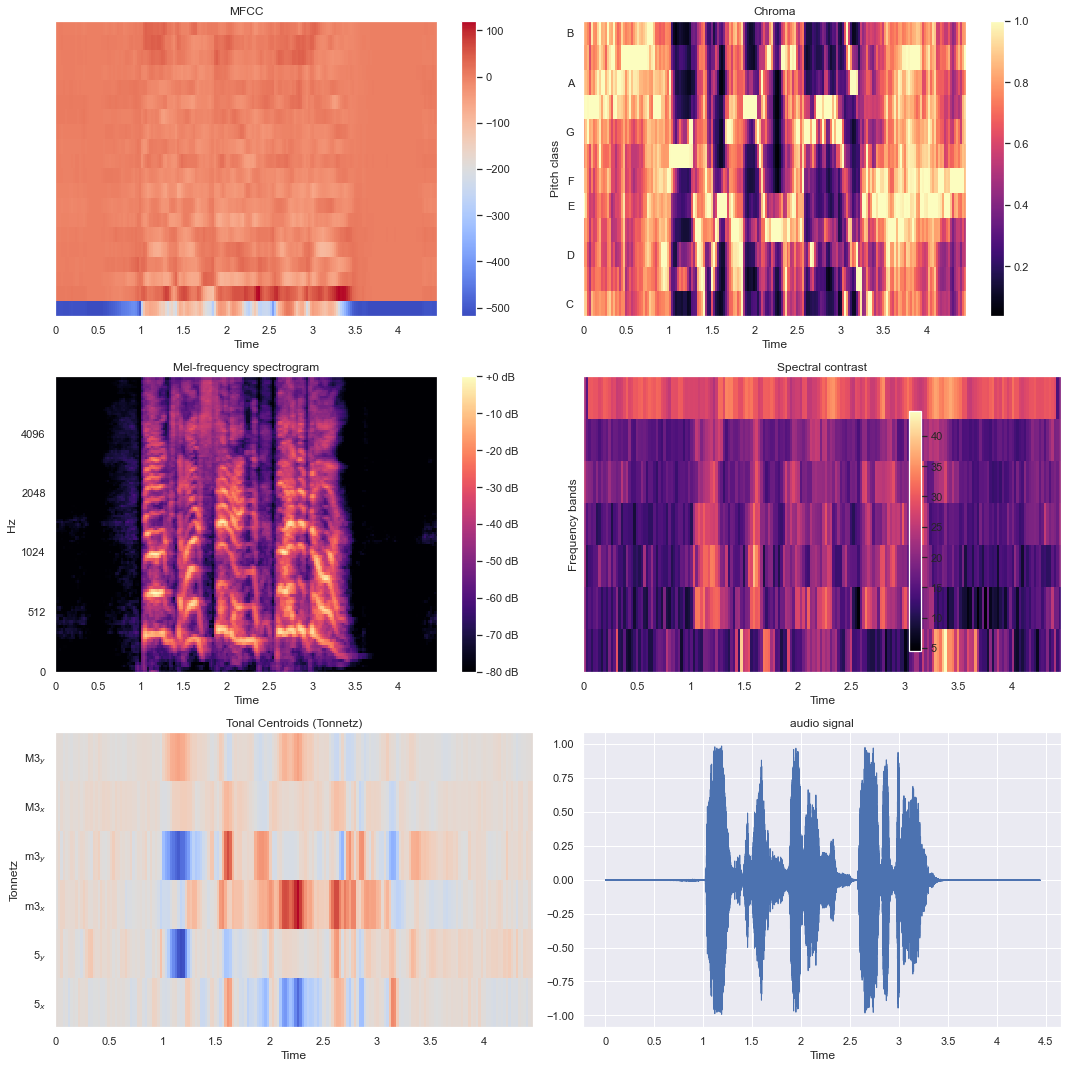

In [ ]:
# Emotion = Angry
filename = 'EDA_test/Sample_Emotions/03-01-05-02-02-02-01.wav'
data,sample_rate=librosa.load(filename)

fig, ax = plt.subplots(nrows=3, ncols=2, constrained_layout=False)
fig.set_size_inches(15, 15)

# mfcc
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[0][0])
plt.colorbar(img, ax=ax[0][0])
ax[0][0].set(title='MFCC')

# chroma
stft = np.abs(librosa.stft(data))
chroma = librosa.feature.chroma_stft(y=data , S=stft, sr=sample_rate)
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[0][1])
plt.colorbar(img, ax=ax[0][1])
ax[0][1].set(title='Chroma')

# mel
mel = librosa.feature.melspectrogram(y=data, sr=sample_rate)
S_dB = librosa.power_to_db(mel, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sample_rate, fmax=8000, ax=ax[1][0])
fig.colorbar(img, ax=ax[1][0], format='%+2.0f dB')
ax[1][0].set(title='Mel-frequency spectrogram')

# contrast
stft = np.abs(librosa.stft(data))
contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
img = librosa.display.specshow(contrast, x_axis='time', ax=ax[1][1])
fig.colorbar(img, ax=[ax[1][1]])
ax[1][1].set(ylabel='Frequency bands', title='Spectral contrast')


# tonnetz
tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(data), sr=sample_rate)
img = librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', ax=ax[2][0])
ax[2][0].set(title='Tonal Centroids (Tonnetz)')

# raw wave form
librosa.display.waveshow(data, sr=sample_rate, ax=ax[2][1])
ax[2][1].set(title='audio signal')

plt.tight_layout()
plt.savefig('EDA_plot/features_audio.png')

ipd.Audio(filename)

# Visualize a feature in different emotions data

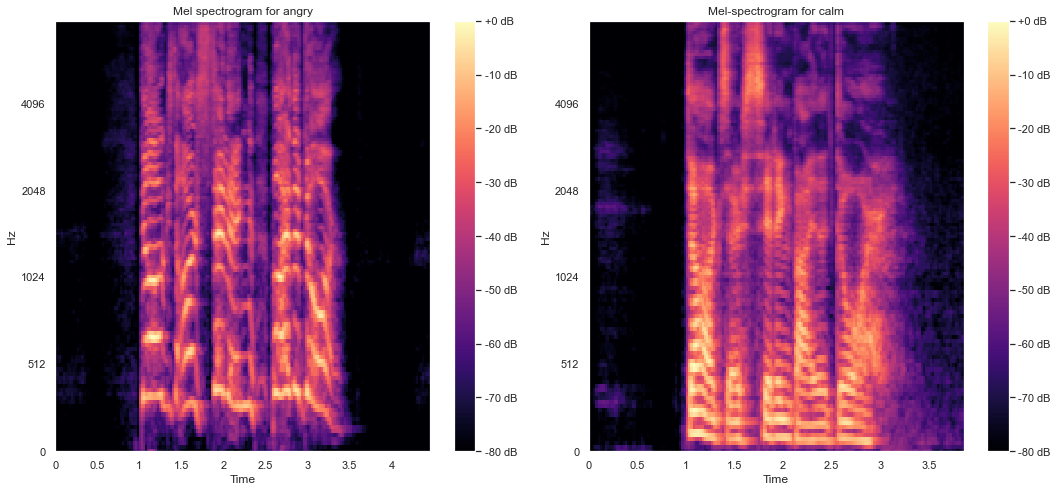

In [ ]:
# Emotion = Angry
file1 = 'EDA_test/Sample_Emotions/03-01-05-02-02-02-01.wav'
data1,sample_rate1=librosa.load(file1)

# Emotion = Calm
file2 = 'EDA_test/Sample_Emotions/03-01-02-01-02-01-03.wav'
data2,sample_rate2=librosa.load(file2)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=False)
fig.set_size_inches(15, 7)

# mel_angry
mel1 = librosa.feature.melspectrogram(y=data1, sr=sample_rate1)
S_dB1 = librosa.power_to_db(mel, ref=np.max)
img1 = librosa.display.specshow(S_dB1, x_axis='time',y_axis='mel', sr=sample_rate1, fmax=8000, ax=ax[0])
fig.colorbar(img1, ax=ax[0], format='%+2.0f dB')
ax[0].set(title='Mel spectrogram for angry')

# mel_calm
mel2 = librosa.feature.melspectrogram(y=data2, sr=sample_rate2)
S_dB2 = librosa.power_to_db(mel2, ref=np.max)
img2 = librosa.display.specshow(S_dB2, x_axis='time',y_axis='mel', sr=sample_rate2, fmax=8000, ax=ax[1])
fig.colorbar(img2, ax=ax[1], format='%+2.0f dB')
ax[1].set(title='Mel-spectrogram for calm')

plt.tight_layout()
plt.savefig('EDA_plot/mel_comparison.png')